# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Read the CSV file into a dataframe
df = pd.read_csv("Cats clean.csv")
# convert dates stored as strings into actual dates
df["movementdate"]=pd.to_datetime(df["movementdate"])
df["intakedate"]=pd.to_datetime(df["intakedate"])
# add a column for the difference in days, aka how long the cat stayed at the shelter.
df["difdays"]=(df["movementdate"]-df["intakedate"])/np.timedelta64(1,'D')
df

,Unnamed: 0,id,intakedate,intakereason,sheltercode,breedname,basecolour,speciesname,animalage,sexname,location,movementdate,movementtype,difdays
0,0,15801,2009-11-28 00:00:00,Moving,C09115463,Domestic Short Hair,Multi colours,Cat,9 years 2 months.,Female,Adoptable Cat Glass Colony,2017-05-13,Adoption,2723.000000
1,3,30812,2013-01-11 00:00:00,Abandoned,C1301091,Domestic Short Hair,Multi colours,Cat,8 years 11 months.,Female,Stray Cats,2017-04-18,Foster,1558.000000
2,4,30812,2013-01-11 00:00:00,Abandoned,C1301091,Domestic Short Hair,Multi colours,Cat,8 years 11 months.,Female,Stray Cats,2018-05-29,Adoption,1964.000000
3,12,46437,2016-10-26 00:00:00,Abandoned,C16103406,Domestic Long Hair,Black,Cat,12 years 3 months.,Female,Stray Cats,2017-03-25,Foster,150.000000
4,13,46437,2016-10-26 00:00:00,Abandoned,C16103406,Domestic Long Hair,Black,Cat,12 years 3 months.,Female,Stray Cats,2017-04-07,Adoption,163.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5744,10280,64564,2019-08-26 15:33:00,Stray,C19081412,Domestic Short Hair,Multi colours,Cat,3 years 0 months.,Female,Cat room C,2019-08-30,Reclaimed,3.352083
5745,10283,64574,2019-08-26 16:48:35,Litter relinquishment,C19081422,Domestic Short Hair,Multi colours,Cat,6 months.,Female,Adoptable Cat Glass Colony,2019-08-30,Adoption,3.299595
5746,10284,64582,2019-08-27 16:12:00,Allergies,C19081427,Domestic Short Hair,Grey,Cat,16 weeks.,Male,Adoptable Cat Kennels,2019-08-30,Adoption,2.325000
5747,10285,64584,2019-08-27 16:52:09,Litter relinquishment,C19081429,Domestic Medium Hair,White mix,Cat,21 weeks.,Male,Cat room C,2019-08-29,Adoption,1.297118


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

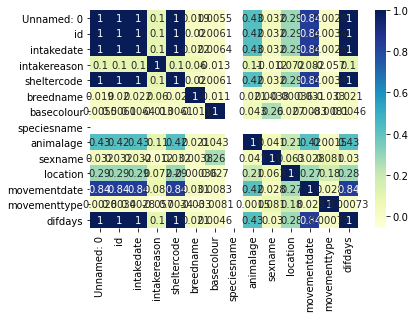

In [2]:
# calculate the correlation values between the columns
# used factorize() method to convert string values to numbers so corr() will work
correlations=df.apply(lambda x: x.factorize()[0]).corr()
# view correlation values in a heat map
sns.heatmap(correlations, xticklabels=df.columns, yticklabels=df.columns, cmap="YlGnBu", annot = True)
plt.show()

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [3]:
# set dependent and independent variables
X = df['basecolour']
y = df['difdays']
# basecoulour is categorical data, so using get_dummies() method to convert it into numerical values
X = pd.get_dummies(X)

# import library to split data
from sklearn.model_selection import train_test_split
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)
# check what the training set looks like
X_train
y_train

883       5.343414
4060     -0.588194
5498      3.277535
1534     19.430532
728      41.624213
           ...    
1890      9.308310
350      54.499907
79       10.000000
3927    188.308634
5640     11.338866
Name: difdays, Length: 4024, dtype: float64

In [4]:
# import statsmodel so we can do linear regression
import statsmodels.api as sm
# statsmodel requires setting the constant/intercept value manually
X_train_sm = sm.add_constant(X_train)
# use the OLS and fit method to try to fit the line to the training data
lr = sm.OLS(y_train, X_train_sm).fit()
# check what the parameters look like
lr.params

const                         -4.351765e+13
Black                          4.351765e+13
Black and other colours mix    4.351765e+13
Brown                          4.351765e+13
Designer colors                4.351765e+13
Grey                           4.351765e+13
Multi colours                  4.351765e+13
Orange                         4.351765e+13
Points                         4.351765e+13
White                          4.351765e+13
White mix                      4.351765e+13
dtype: float64

In [5]:
# print the summary so we can see the R-squared and p-values
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                difdays   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.546
Date:                Sun, 06 Mar 2022   Prob (F-statistic):              0.117
Time:                        11:23:45   Log-Likelihood:                -23524.
No. Observations:                4024   AIC:                         4.707e+04
Df Residuals:                    4013   BIC:                         4.714e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                       -4.352e+13   9.59e+13     -0.454      0.650   -2.31e+14    1.44e+14
Black                        4.352e+13   9.59e+13      0.454      0.650   -1.44e+14    2.31e+14
Black and other colours mix  4.352e+13   9.59e+13      0.454      0.650   -1.44e+14    2.31e+14
Brown                        4.352e+13   9.59e+13      0.454      0.650   -1.44e+14    2.31e+14
Designer colors              4.352e+13   9.59e+13      0.454      0.650   -1.44e+14    2.31e+14
Grey                         4.352e+13   9.59e+13      0.454      0.650   -1.44e+14    2.31e+14
Multi colours                4.352e+13   9.59e+13      0.454      0.650   -1.44e+14    2.31e+14
Orange                       4.352e+13   9.59e+13      0.454      0.650   -1.44e+14    2.31e+14
Points                       4.352e+13   9.59e+13      0.454      0.650   -1.44e+14    2.31e+14
White                        4.352e+13   9.59e+13      0.454      0.650   -1.44e+14    2.31e+14
White mix                    4.352e+13   9.59e+13      0.454      0.650   -1.44e+14    2.31e+14
==============================================================================
Omnibus:                     7814.553   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         22999036.449
Skew:                          14.994   Prob(JB):                         0.00
Kurtosis:                     372.150   Cond. No.                     2.62e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.94e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

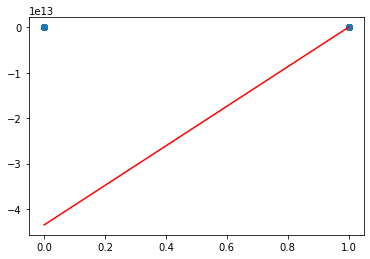

In [6]:
# make a scatter plot...not sure how to get it to use all of the X dummy columns, so just plotting the "black" column
plt.scatter(X_train["Black"], y_train)
# plot the line given by the coefficient values above
# ...they are ridiculous numbers because this data is not really suited for this analysis
plt.plot(X_train["Black"], -43520000000000 + 43520000000000*X_train["Black"], 'r')
# show the graph
plt.show()

## Error Terms

Finally, plot your error terms!

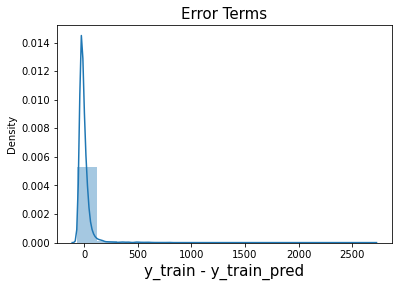

In [7]:
# use predict method
y_train_pred = lr.predict(X_train_sm)
# create 'residuals' used in next step
res = (y_train - y_train_pred)
# plot a distribution graph for our 'error terms'
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.004
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? It was not particularly effective in this case. I dont think this was the right data set for linear regression model 
3. Was your plot of the error terms a bell curve? Not at all. 